(28, 28)


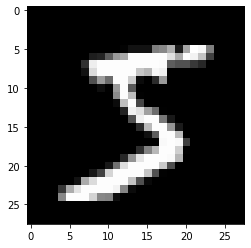

In [24]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torchvision.datasets import MNIST

# the data is already normalized, no need to transform further...
digits = MNIST('data', train=True, download=False)

digits = digits.data.numpy()
digits = digits/np.max(digits)

display = plt.imshow(digits[0])
display.set_cmap('gray')
print(digits[0].shape)

[[0.94117647 0.99215686 0.99215686 0.46666667]
 [0.17647059 0.72941176 0.99215686 0.99215686]
 [0.         0.0627451  0.36470588 0.98823529]
 [0.         0.         0.         0.97647059]]


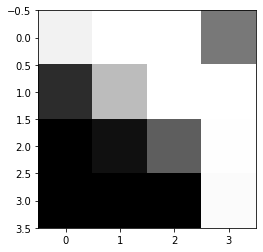

In [26]:
# grab 4x4 squares of the image
im1 = digits[0]

stride = 1
mat_sq = np.zeros([28,28,4,4])

for i in range(0, len(im1)-4, stride):
    for j in range(0, len(im1[i])-4, stride):
        cube = im1[i:i+4, j:j+4]
        mat_sq[i, j] = cube
        
# creates a 2d collection of matrices, where each [i, j] index contains a 4x4 matrix 
print(mat_sq[14, 14])
display = plt.imshow(mat_sq[14, 14])
display.set_cmap('gray')

In [29]:
# find SVD of each submatrix, make unitary and assign to uni
uni = np.zeros([28,28,4,4])

for i in range(len(mat_sq)):
    for j in range(len(mat_sq[i])):
        U, S, VT = np.linalg.svd(mat_sq[i, j])
        uni[i, j] = np.dot(U, VT)
        #print(f"U =\n{U}\n S =\n{S}\n VT=\n{VT}\n")

test = uni[14,14]
# comparing unitary, they aren't the same :(
print(f"U*VT:\n{uni[14, 14]}\nOriginal:\n{mat_sq[14, 14]}")


U*VT:
[[ 0.85413351  0.41126815  0.31537472  0.04304922]
 [-0.50001648  0.58320301  0.54863064  0.32994272]
 [ 0.11598605 -0.66753227  0.48034988  0.55696669]
 [ 0.08358647  0.21244629 -0.60729499  0.76096825]]
Original:
[[0.94117647 0.99215686 0.99215686 0.46666667]
 [0.17647059 0.72941176 0.99215686 0.99215686]
 [0.         0.0627451  0.36470588 0.98823529]
 [0.         0.         0.         0.97647059]]


Q:
[[-0.98287219  0.18302974  0.02150299  0.        ]
 [-0.18428854 -0.97615861 -0.11468262  0.        ]
 [-0.         -0.11668111  0.99316943  0.        ]
 [-0.         -0.          0.          1.        ]]
Original:
[[0.94117647 0.99215686 0.99215686 0.46666667]
 [0.17647059 0.72941176 0.99215686 0.99215686]
 [0.         0.0627451  0.36470588 0.98823529]
 [0.         0.         0.         0.97647059]]
Is Q Unitary:
[[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]


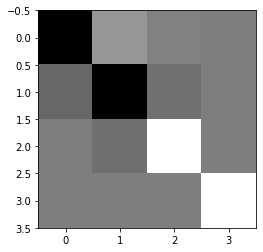

In [32]:
# try graham schmidt, they're just about the same!
# seems to have detected an edge.
Q, R = np.linalg.qr(mat_sq[14, 14])

print(f"Q:\n{Q}\nOriginal:\n{mat_sq[14, 14]}\nIs Q Unitary:\n{np.matmul(Q, Q.transpose(0, 1)).round()}")

display = plt.imshow(Q)
display.set_cmap('gray')